Preparando el Dataset: Goku vs Vegeta


In [3]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

IMAGE_SIZE = (224, 224)

TensorFlow 2.x selected.
  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp36-none-any.whl size=7012 sha256=3d751c84510ddb7549f2cf308a3dd0fa27e1b10f0979d0dddd1cd76d968d0846
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures


In [0]:
class_names = ['goku','vegeta']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_gk_dir = os.path.join(train_dir, 'goku')  
train_vg_dir = os.path.join(train_dir, 'vegeta')  
validation_gk_dir = os.path.join(validation_dir, 'goku') 
validation_vg_dir = os.path.join(validation_dir, 'vegeta')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_gk_dir)
os.makedirs(train_vg_dir)
os.makedirs(validation_gk_dir)    
os.makedirs(validation_vg_dir)


In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return

In [6]:
## DESCARGAR DATASET DE GOKU

img_dir = os.path.realpath('Images/')
queries = ['super sayan','super sayan 1','super sayan 2','super sayan 3','super sayan 4']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='goku '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_gk_dir, validation_gk_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=goku super sayan&source=lnms&tbm=isch
Error  HTTPSConnectionPool(host='www.eknightmedia.com', port=443): Max retries exceeded with url: /media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/4/5/4573102581365.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))
Invalid image:  3.jpg cannot write mode RGBA as JPEG
Invalid image:  8.jpg cannot write mode RGBA as JPEG
Invalid image:  1.jpg cannot write mode RGBA as JPEG
Invalid image:  14.jpg cannot write mode RGBA as JPEG
Invalid image:  15.jpg cannot write mode RGBA as JPEG
Invalid image:  4.jpg cannot write mode RGBA as JPEG
Invalid image:  2.jpg cannot write mode RGBA as JPEG
https://www.google.co.in/search?q=goku super sayan 1&source=lnms&tbm=isch
Error  HTTPSConnectionPool(host='www.eknightmedia.com', port=443): Max retries exceeded with url: /media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/4/5/454311262

In [7]:
## DESCARGAR DATASET DE VEGETA

img_dir = os.path.realpath('Images/')
queries = ['super sayan','super sayan 1','super sayan 2','super sayan 3','super sayan 4']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='vegeta '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_vg_dir, validation_vg_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=vegeta super sayan&source=lnms&tbm=isch
Error  HTTPSConnectionPool(host='www.eknightmedia.com', port=443): Max retries exceeded with url: /media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/4/5/4573102581358.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))
Invalid image:  22.jpg cannot write mode P as JPEG
Invalid image:  1.jpg cannot write mode RGBA as JPEG
Invalid image:  90.jpg cannot identify image file '/content/Images/90.jpg'
Invalid image:  57.jpg cannot write mode RGBA as JPEG
Invalid image:  55.jpg cannot write mode RGBA as JPEG
Invalid image:  82.jpg cannot write mode RGBA as JPEG
Invalid image:  54.jpg cannot identify image file '/content/Images/54.jpg'
Invalid image:  16.jpg cannot write mode RGBA as JPEG
Invalid image:  67.jpg cannot write mode RGBA as JPEG
Invalid image:  15.jpg cannot write mode RGBA as JPEG
https://www.google.co.in/search?q=vegeta super s

In [8]:
total_train = len(os.listdir(train_gk_dir))+ len(os.listdir(train_vg_dir))
total_val = len(os.listdir(validation_gk_dir))+ len(os.listdir(validation_vg_dir))

print('total training Goku images:', len(os.listdir(train_gk_dir)))
print('total training Vegeta images:', len(os.listdir(train_vg_dir)))

print('total validation Goku images:', len(os.listdir(validation_gk_dir)))
print('total validation Vegeta images:', len(os.listdir(validation_vg_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Goku images: 251
total training Vegeta images: 345
total validation Goku images: 35
total validation Vegeta images: 50
--
Total training images: 596
Total validation images: 85


BUILDING MODEL

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

image_batch, labels_batch = next(train_data_gen)

Found 596 images belonging to 2 classes.
Found 85 images belonging to 2 classes.


In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(50):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

In [0]:
## DOWNLOADING PAST NN
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))
feature_batch = feature_extractor_layer(image_batch)
feature_extractor_layer.trainable = False

model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),
  Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
## TRAINING MODEL

history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 3 steps
Epoch 1/5
5/5 [==============================] - 35s 7s/step - loss: 1.2610 - accuracy: 0.6081 - val_loss: 1.4198 - val_accuracy: 0.5882
Epoch 2/5
5/5 [==============================] - 32s 6s/step - loss: 1.0829 - accuracy: 0.6438 - val_loss: 0.9203 - val_accuracy: 0.6235
Epoch 3/5
5/5 [==============================] - 32s 6s/step - loss: 0.7085 - accuracy: 0.6562 - val_loss: 0.7525 - val_accuracy: 0.6588
Epoch 4/5
5/5 [==============================] - 32s 6s/step - loss: 0.4444 - accuracy: 0.8188 - val_loss: 0.4721 - val_accuracy: 0.7882
Epoch 5/5
5/5 [==============================] - 32s 6s/step - loss: 0.4656 - accuracy: 0.8250 - val_loss: 0.4740 - val_accuracy: 0.8000


ValueError: ignored

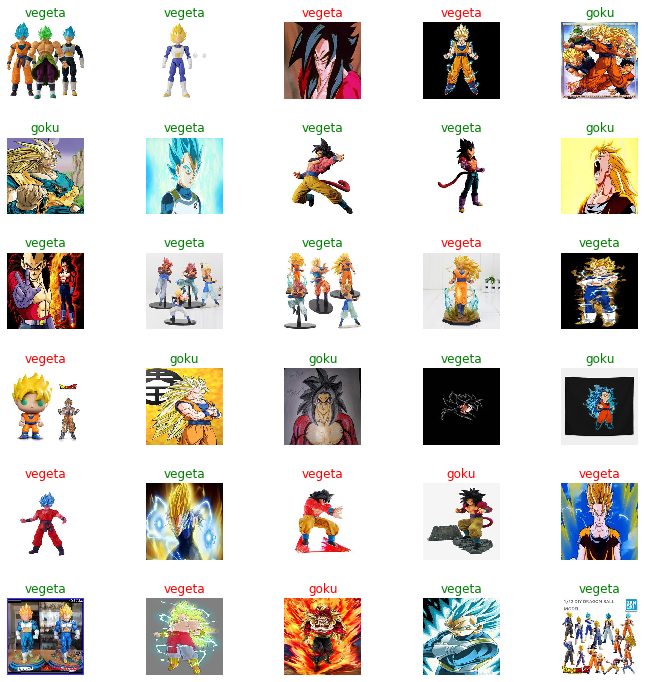

In [13]:
#Test
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)